# Decision Tree Project

This dataset originally comes from the National Institute of Diabetes and Digestive and Kidney Diseases. The goal is to predict based on diagnostic measures whether or not a patient has diabetes.

#### Step 1: Loading the dataset

In [55]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Step 2: Perform a full EDA

In [56]:
# Data info:

total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [57]:
# Data shape:

total_data.shape

(768, 9)

In [58]:
# Drop duplicated rows:

if total_data.duplicated().sum() > 0:
    total_data.drop_duplicates(inplace=True)
    total_data.reset_index(drop=True, inplace=True)

total_data.shape

(768, 9)

- We only have numerical variables in the dataset.
- It is not necessary a normalization process for the variables to train this model.

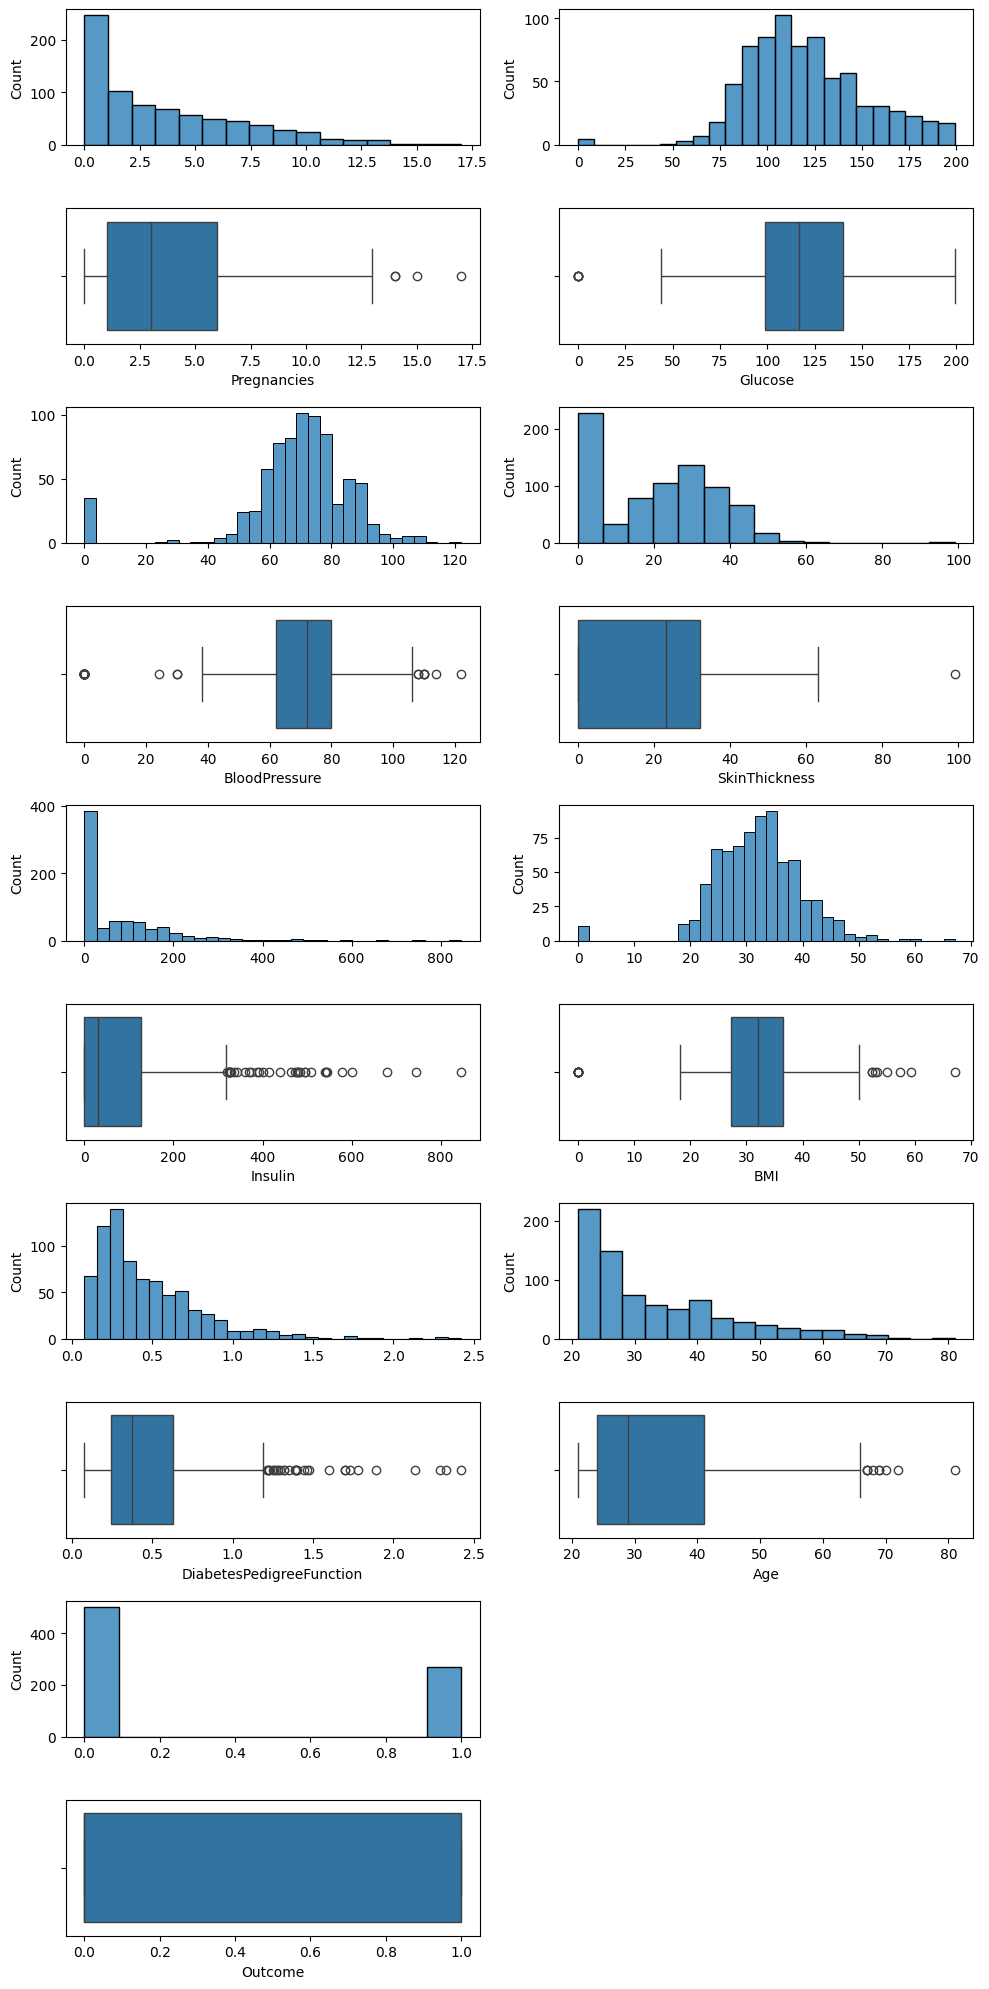

In [59]:
# Univariate Data Analysis
# Numerical Univariate Analysis:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# List of column names from your dataset

column_names = total_data.columns

# Create the subplots with custom height ratios

fig, axis = plt.subplots(10, 2 , figsize=(10, 20))

# Iterate through each column and plot histograms and box plots

for i, col_name in enumerate(column_names):
    if i % 2 == 0 :
        sns.histplot(ax = axis[i, 0], data = total_data, x = col_name).set(xlabel=None)
        sns.boxplot(ax = axis[i + 1, 0 ], data = total_data, x = col_name)
    else :
        sns.histplot(ax=axis[i - 1, 1], data = total_data, x = col_name).set(xlabel=None)
        sns.boxplot(ax=axis[i , 1 ], data = total_data, x = col_name)

plt.delaxes(axis[8,1])
plt.delaxes(axis[9,1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

- We need to eliminate some outliers based on health data: glucose cannot be 0 and blood pressure cannot be 0.

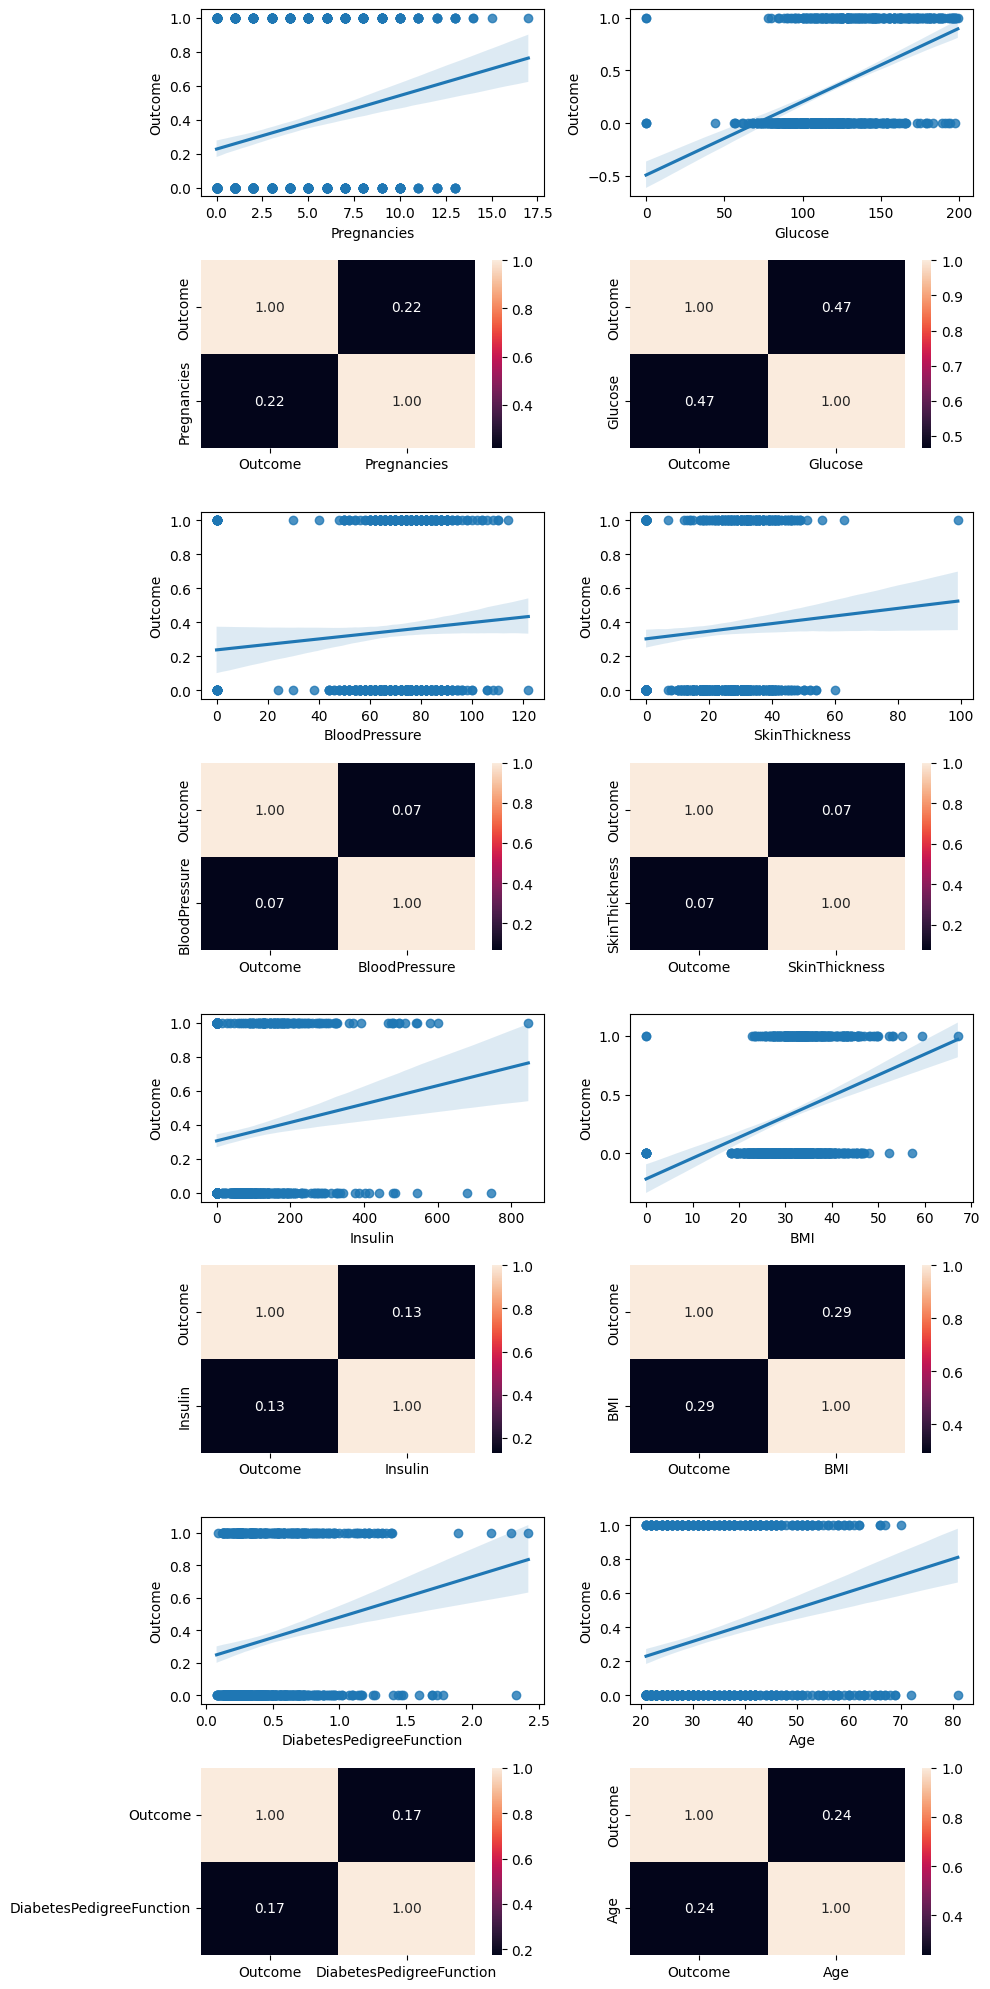

In [60]:
# Multivariate Analysis
# Numerical-Numerical Analysis:

column_names = total_data.loc[:, total_data.columns != 'Outcome'].columns

fig, axis = plt.subplots(8, 2, figsize=(10, 20))


for i, col_name in enumerate(column_names):
    if i % 2 == 0:
        sns.regplot(ax=axis[i, 0], data=total_data, x=col_name, y='Outcome')
        sns.heatmap(total_data[['Outcome', col_name]].corr(), annot=True, fmt=".2f", ax=axis[i + 1, 0])
    else:
        sns.regplot(ax=axis[i - 1, 1], data=total_data, x=col_name, y='Outcome')
        sns.heatmap(total_data[['Outcome', col_name]].corr(), annot=True, fmt=".2f", ax=axis[i, 1])

plt.tight_layout()


plt.show()


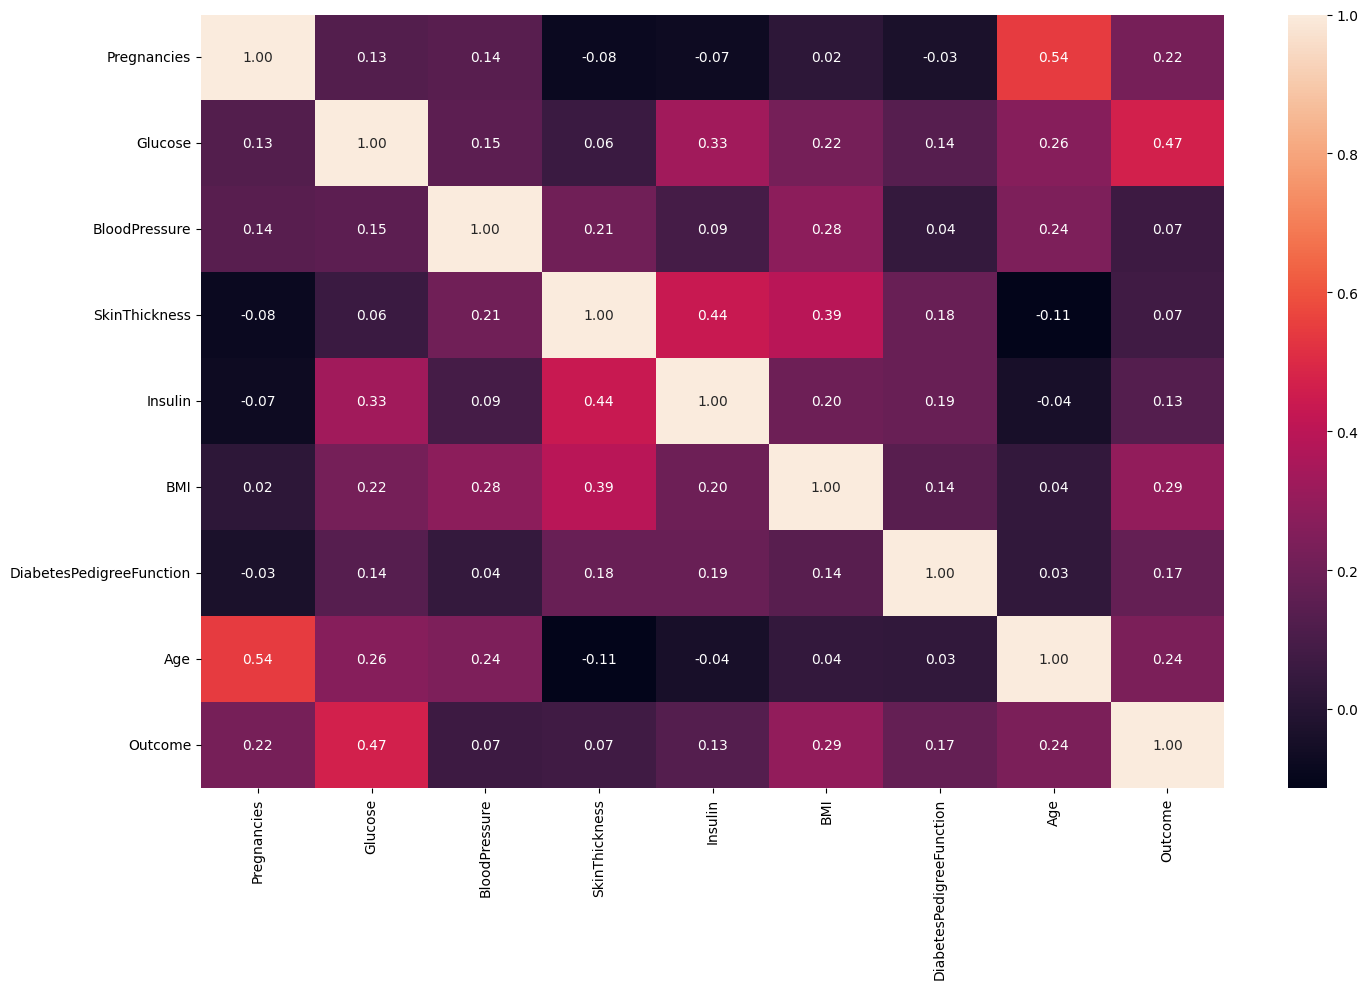

In [61]:
# Correlation Analysis:

fig, axis = plt.subplots(figsize=(15, 10))
sns.heatmap(total_data.corr(), annot=True, fmt='.2f')

plt.tight_layout()
plt.show()

Conclusions:
- There are some strong correlations of our target Outcome with Glucose, BMI, Age and Pregnancies.

In [62]:
# Outliers Analysis:

total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [63]:
def statistics_data(total_data, num_columns):

    # Filter numerical variable columns:

    cat_num = total_data[num_columns]

    # Calculate Q1 and Q3:
    
    q1 = cat_num.quantile(0.25)
    q3 = cat_num.quantile(0.75)

    # Calculate IQR ()

    iqr = q3 - q1

    # Calculate max and min:

    min = cat_num.min()
    max = cat_num.max()

    # Calculate upper_limit and lower_limit:

    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    # Create a new DataFrame with the results:

    stat_results = pd.DataFrame({ 'Lower Limit': lower_limit,'Upper Limit': upper_limit,'IQR': iqr,
                                'Min': min, 'Q1': q1, 'Mean': cat_num.mean(), 'Median (Q2)': cat_num.median(),
                                'Q3': q3, 'Max': max,})

    return stat_results

# Calculate the statistics of the numerical variables
num_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
stat_results = statistics_data(total_data, num_columns)

print("Statistic Results:")
print(stat_results)


Statistic Results:
                          Lower Limit  Upper Limit       IQR     Min  \
Pregnancies                    -6.500       13.500    5.0000   0.000   
Glucose                        37.125      202.125   41.2500   0.000   
BloodPressure                  35.000      107.000   18.0000   0.000   
SkinThickness                 -48.000       80.000   32.0000   0.000   
Insulin                      -190.875      318.125  127.2500   0.000   
BMI                            13.350       50.550    9.3000   0.000   
DiabetesPedigreeFunction       -0.330        1.200    0.3825   0.078   
Age                            -1.500       66.500   17.0000  21.000   

                                Q1        Mean  Median (Q2)         Q3     Max  
Pregnancies                1.00000    3.845052       3.0000    6.00000   17.00  
Glucose                   99.00000  120.894531     117.0000  140.25000  199.00  
BloodPressure             62.00000   69.105469      72.0000   80.00000  122.00  
SkinThic

In [64]:
# Calculate the interquartile range (IQR) for each numerical column:

q1 = total_data.quantile(0.25)
q3 = total_data.quantile(0.75)
iqr = q3 - q1

# Filter the DataFrame to remove outliers:

total_data = total_data[~((total_data < (q1 - 1.5 * iqr)) | (total_data > (q3 + 1.5 * iqr))).any(axis=1)]

total_data.shape

(639, 9)

In [65]:
# Check if there are nulls in the dataset:

total_data.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [66]:
# It is not required to normalize the predictor variables to train this model. Decision trees are not affected by the scale of the data.

# Feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X = total_data.drop("Outcome", axis = 1)
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 6)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,1.0,149.0,68.0,29.3,0.349,42.0
1,0.0,140.0,65.0,42.6,0.431,24.0
2,5.0,122.0,86.0,34.7,0.290,33.0
3,10.0,161.0,68.0,25.5,0.326,47.0
4,3.0,150.0,76.0,21.0,0.207,37.0


In [67]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("/workspaces/machine-learning-decision-tree-Juli-MM/data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("/workspaces/machine-learning-decision-tree-Juli-MM/data/processed/clean_test.csv", index = False)

#### Step 3: Build a regression model

In [68]:
# Decision Tree Model:

# Reading the processed dataset

train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,149.0,68.0,29.3,0.349,42.0,1
1,0.0,140.0,65.0,42.6,0.431,24.0,1
2,5.0,122.0,86.0,34.7,0.290,33.0,0
3,10.0,161.0,68.0,25.5,0.326,47.0,1
4,3.0,150.0,76.0,21.0,0.207,37.0,0


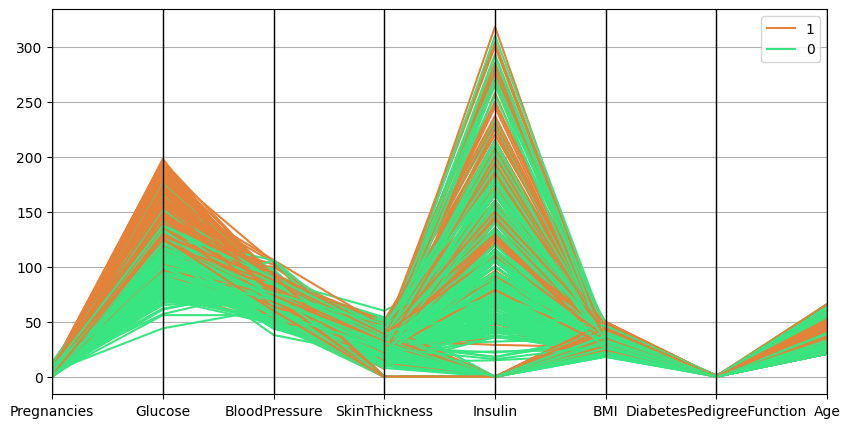

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

In [70]:
# Separate predictors and target variable in training and test data:

X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [71]:
# Creating and training the decision tree model:

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

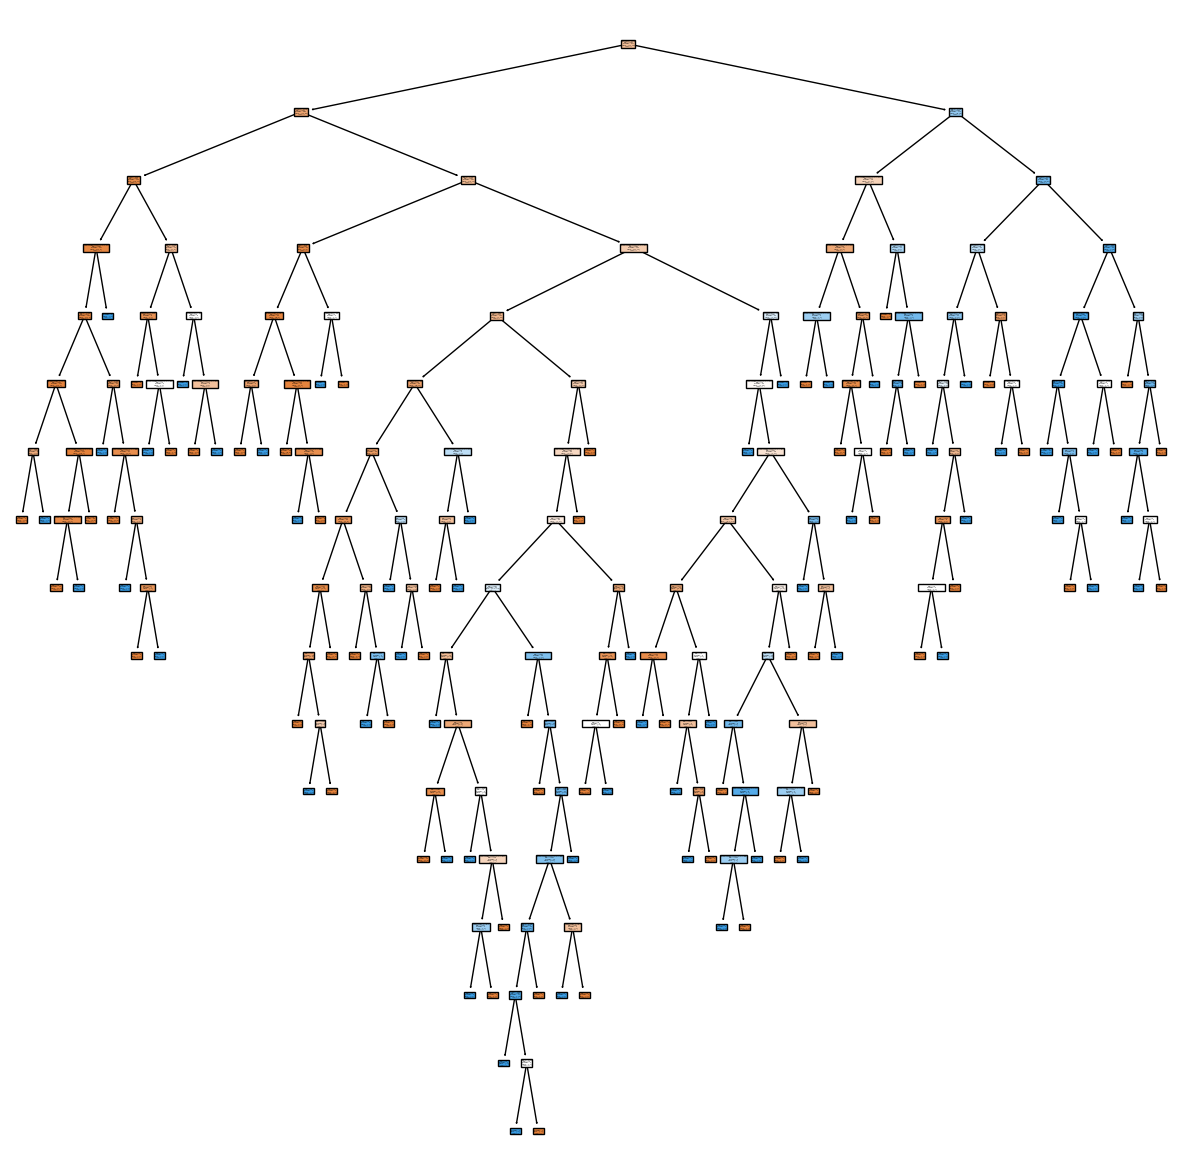

In [72]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [73]:
# Make predictions on test data:

y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [74]:
# Calculating model accuracy on test data:

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.765625

#### Step 4: Optimize the previous model

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [76]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [77]:
# Retrain model with best hyperparameters:

model = DecisionTreeClassifier(criterion = "gini", max_depth = 5, min_samples_leaf = 2, min_samples_split = 10, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [78]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [79]:
# Calculating model accuracy:

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8046875

#### Step 5: Save the model

In [80]:
from pickle import dump

dump(model, open("/workspaces/machine-learning-decision-tree-Juli-MM/models/tree_classifier_crit-gini_maxdepth-5_minleaf-2_minsplit-10_42.sav", "wb"))

- Pregnancies. Number of pregnancies of the patient (numeric)
- Glucose. Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)
- BloodPressure. Diastolic blood pressure (measured in mm Hg) (numeric)
- SkinThickness. Triceps skinfold thickness (measured in mm) (numeric)
- Insulin. 2-hour serum insulin (measured in mu U/ml) (numeric)
- BMI. Body mass index (numeric)
- DiabetesPedigreeFunction. Diabetes Pedigree Function (numeric)
- Age. Age of patient (numeric)
- Outcome. Class variable (0 or 1), being 0 negative in diabetes and 1, positive (numeric)